# 2.2 - La panadería de Güelita

In [1]:
import pylab as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
breadbasket=pd.read_csv('data/breadbasket_dms.csv')


breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
breadbasket.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [5]:
breadbasket['Datetime']=pd.to_datetime(breadbasket.Date+' '+breadbasket.Time,
                                      format='%Y-%m-%d %H:%M:%S')

breadbasket.head()

,Date,Time,Transaction,Item,Datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [6]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [7]:
breadbasket.Item.nunique()

95

In [8]:
breadbasket.Item.value_counts().nlargest(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [9]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

food=beverage+other+kids+snacks+bread+breakfast_pastry+dessert+condiments+breakfast+lunch

other_food=[e for e in breadbasket.Item.unique() if e not in food]

food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']

for i in range(len(food_names)):
    breadbasket[food_names[i]]=np.where(breadbasket.Item.isin(food_list[i]), 1, 0)
    
breadbasket.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0


In [10]:
bread_group=breadbasket.groupby(['Datetime', 'Transaction']).sum()

bread_group.head()

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Datetime,Transaction,,,,,,,,,,
2016-10-30 09:58:11,1,0,0,0,0,1,0,0,0,0,0
2016-10-30 10:05:34,2,0,0,0,0,2,0,0,0,0,0
2016-10-30 10:07:57,3,1,0,0,0,0,0,1,1,0,0
2016-10-30 10:08:41,4,0,0,0,0,0,1,0,0,0,0
2016-10-30 10:13:03,5,1,0,0,0,1,1,0,0,0,0


In [12]:
bread_group.shape

(9531, 10)

In [13]:
bread_group.reset_index(level='Datetime', inplace=True)

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Transaction,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0


In [15]:
bread_group['day']=bread_group.Datetime.dt.day_name()
bread_group['hour']=bread_group.Datetime.dt.hour
bread_group['month']=bread_group.Datetime.dt.month

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10


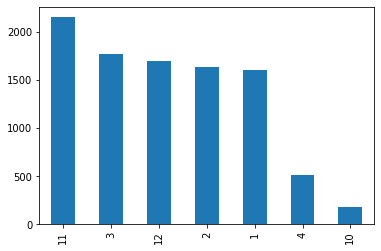

In [16]:
bread_group.month.value_counts().plot(kind='bar');

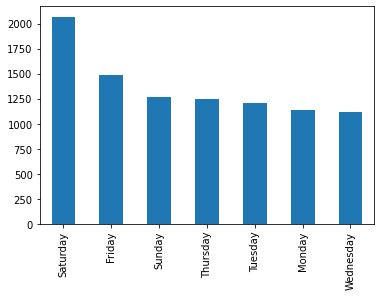

In [17]:
bread_group.day.value_counts().plot(kind='bar');

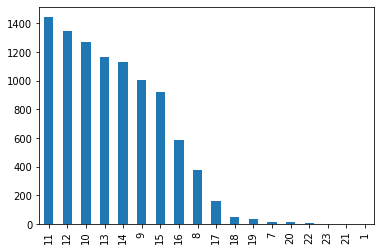

In [27]:
bread_group.hour.value_counts().plot(kind='bar');

In [28]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('Datetime', axis=1)

bread_dummy.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,9,10,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,10,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,10,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,10,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,10,10,0,0,0,1,0,0,0


In [29]:
bread_dummy.shape

(9531, 19)

### PCA

In [30]:
from sklearn.decomposition import PCA

In [68]:
bread_group.drop(columns=['day', 'hour', 'month', 'Datetime'])

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,label_kmeans
Transaction,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2,0,0,0,0,0,1
3,1,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,1
5,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,3
9681,1,1,0,0,0,0,1,0,0,0,3
9682,2,0,0,0,0,1,0,0,0,0,3


In [69]:
pca=PCA(n_components=4).fit_transform(bread_group.drop(columns=['day', 'hour', 'month', 'Datetime']))

pca_df=pd.DataFrame(pca, columns=[f'pca_{i+1}' for i in range(4)])

pca_df.head()

,pca_1,pca_2,pca_3,pca_4
0,2.069095,-1.068666,-0.175038,0.204795
1,2.073015,-1.389170,-0.538785,1.071259
2,2.067719,0.336891,0.807306,-0.020882
3,2.076851,-0.692642,0.016214,-0.831768
4,2.086298,-0.085515,-0.616659,0.276392


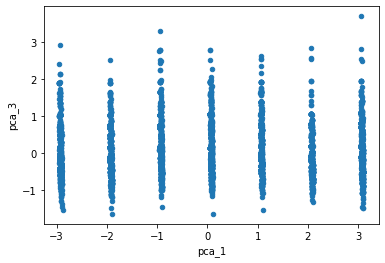

In [70]:
pca_df.plot.scatter(x='pca_1', y='pca_3');

### t-SNE

In [38]:
from sklearn.manifold import TSNE

In [41]:
tsne=TSNE(n_components=3, perplexity=15).fit_transform(bread_dummy)

tsne_df=pd.DataFrame(tsne, columns=[f'tsne_{i+1}' for i in range(3)])

tsne_df.head()

,tsne_1,tsne_2,tsne_3
0,32.987129,12.213183,0.097557
1,33.119209,12.645080,-0.789659
2,29.306929,9.946648,-1.436125
3,33.110023,10.318921,-2.017262
4,29.850756,13.026751,0.587032


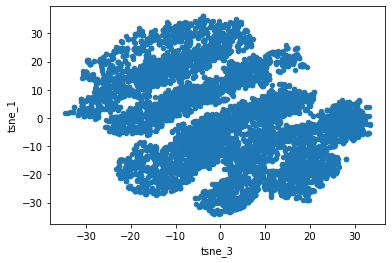

In [45]:
tsne_df.plot.scatter(x='tsne_3', y='tsne_1');

### UMAP

In [43]:
import warnings
warnings.simplefilter('ignore')

from umap import UMAP

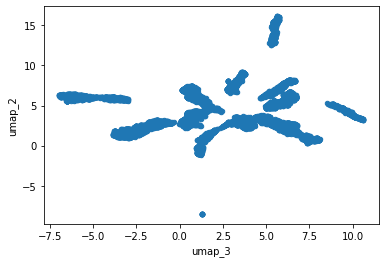

In [47]:
umap=UMAP(n_components=4).fit_transform(bread_dummy)

umap_df=pd.DataFrame(umap, columns=[f'umap_{i+1}' for i in range(4)])

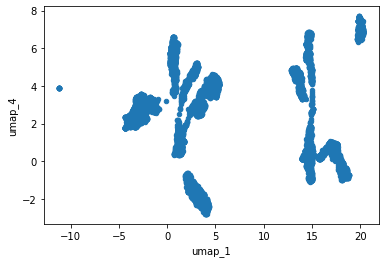

In [50]:
umap_df.plot.scatter(x='umap_1', y='umap_4');

### Clustering

In [51]:
# K-Means

from sklearn.cluster import KMeans

In [71]:
kmeans=KMeans(n_clusters=7).fit(pca_df)

In [72]:
bread_group['label_kmeans']=kmeans.predict(pca_df)

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month,label_kmeans
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10,1
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10,1
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10,2
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10,1
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10,1


In [73]:
bread_group.label_kmeans.value_counts()

0    1847
2    1415
1    1389
4    1350
3    1278
6    1257
5     995
Name: label_kmeans, dtype: int64

In [74]:
# clusters transacciones por hora

cm=sns.light_palette('green', as_cmap=True)

pd.crosstab(bread_group.hour, bread_group.label_kmeans).style.background_gradient(cmap=cm)

label_kmeans,0,1,2,3,4,5,6
hour,,,,,,,
1,0,0,0,1,0,0,0
7,4,5,6,1,0,0,0
8,110,93,71,99,0,2,0
9,316,209,229,244,0,9,0
10,420,285,293,250,0,19,0
11,388,387,423,247,0,0,0
12,314,410,393,230,0,0,0
13,295,0,0,206,280,104,278
14,0,0,0,0,449,134,547


In [75]:
# por dia

pd.crosstab(bread_group.day, bread_group.label_kmeans).style.background_gradient(cmap=cm)

label_kmeans,0,1,2,3,4,5,6
day,,,,,,,
Friday,276,228,228,199,214,148,195
Monday,227,152,203,130,155,113,155
Saturday,355,334,285,311,320,214,249
Sunday,268,194,181,164,169,124,164
Thursday,245,180,195,156,181,118,177
Tuesday,243,148,184,155,160,140,173
Wednesday,233,153,139,163,151,138,144


In [77]:
bread_group.groupby(bread_group.label_kmeans).sum().style.background_gradient(cmap=cm)

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month
label_kmeans,,,,,,,,,,,,
0,2496,246,10,20,452,456,415,20,41,173,19823,13298
1,296,94,3,1,1157,354,255,40,21,101,14687,8426
2,2081,157,5,4,186,490,343,32,16,173,14970,8585
3,32,106,5,1,1009,269,260,44,18,70,13651,9089
4,96,122,11,7,853,197,427,52,26,185,19870,6923
5,1521,46,1,2,251,162,786,11,17,268,14848,2247
6,1741,141,12,14,218,241,315,21,21,366,18050,9430
